# 使用vgg16提取图像特征，再根据特征建立mlp

In [13]:
from keras.preprocessing.image import load_img, img_to_array
img_path = './training_set_16/cats/cat.1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [14]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet', include_top=False)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [15]:
# 特征提取
features = model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [16]:
#flatten 展开
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


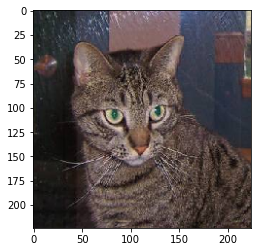

In [17]:
#可视化图片
from matplotlib import pyplot as plt
%matplotlib inline 
fig = plt.figure()
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

# 数据预处理

In [34]:
import numpy as np
#定义加载和初始化的方法
def modelProcess(img_path, model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(-1,25088)
    return x_vgg
import os
#列出训练数据的名字
folder = 'training_set_16/cats'
dirs = os.listdir(folder)
#生成图片的路径
img_path =[]
for i in dirs:
    if os.path.splitext(i)[1] == '.jpg':
        img_path.append(i)
img_path = [folder+'//'+i for i in img_path]

#preprocessing multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessing_cat:',i)
    features1[i] = feature_i
    
#狗的部分
folder = 'training_set_16/dogs'
dirs = os.listdir(folder)
#生成图片的路径
img_path =[]
for i in dirs:
    if os.path.splitext(i)[1] == '.jpg':
        img_path.append(i)
img_path = [folder+'/'+i for i in img_path]

#preprocessing multiple images
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessing_dog:',i)
    features2[i] = feature_i
    
#label the results
print(features1.shape, features2.shape)
y1 = np.zeros(500)
y2 = np.ones(500)

#generate the training data
X = np.concatenate((features1, features2), axis=0)
y = np.concatenate((y1,y2), axis=0)
y = y.reshape(-1,1)
print('数据预处理_完成')
print(X.shape,y.shape)

preprocessing_cat: 0
preprocessing_cat: 1
preprocessing_cat: 2
preprocessing_cat: 3
preprocessing_cat: 4
preprocessing_cat: 5
preprocessing_cat: 6
preprocessing_cat: 7
preprocessing_cat: 8
preprocessing_cat: 9
preprocessing_cat: 10
preprocessing_cat: 11
preprocessing_cat: 12
preprocessing_cat: 13
preprocessing_cat: 14
preprocessing_cat: 15
preprocessing_cat: 16
preprocessing_cat: 17
preprocessing_cat: 18
preprocessing_cat: 19
preprocessing_cat: 20
preprocessing_cat: 21
preprocessing_cat: 22
preprocessing_cat: 23
preprocessing_cat: 24
preprocessing_cat: 25
preprocessing_cat: 26
preprocessing_cat: 27
preprocessing_cat: 28
preprocessing_cat: 29
preprocessing_cat: 30
preprocessing_cat: 31
preprocessing_cat: 32
preprocessing_cat: 33
preprocessing_cat: 34
preprocessing_cat: 35
preprocessing_cat: 36
preprocessing_cat: 37
preprocessing_cat: 38
preprocessing_cat: 39
preprocessing_cat: 40
preprocessing_cat: 41
preprocessing_cat: 42
preprocessing_cat: 43
preprocessing_cat: 44
preprocessing_cat: 4

preprocessing_cat: 361
preprocessing_cat: 362
preprocessing_cat: 363
preprocessing_cat: 364
preprocessing_cat: 365
preprocessing_cat: 366
preprocessing_cat: 367
preprocessing_cat: 368
preprocessing_cat: 369
preprocessing_cat: 370
preprocessing_cat: 371
preprocessing_cat: 372
preprocessing_cat: 373
preprocessing_cat: 374
preprocessing_cat: 375
preprocessing_cat: 376
preprocessing_cat: 377
preprocessing_cat: 378
preprocessing_cat: 379
preprocessing_cat: 380
preprocessing_cat: 381
preprocessing_cat: 382
preprocessing_cat: 383
preprocessing_cat: 384
preprocessing_cat: 385
preprocessing_cat: 386
preprocessing_cat: 387
preprocessing_cat: 388
preprocessing_cat: 389
preprocessing_cat: 390
preprocessing_cat: 391
preprocessing_cat: 392
preprocessing_cat: 393
preprocessing_cat: 394
preprocessing_cat: 395
preprocessing_cat: 396
preprocessing_cat: 397
preprocessing_cat: 398
preprocessing_cat: 399
preprocessing_cat: 400
preprocessing_cat: 401
preprocessing_cat: 402
preprocessing_cat: 403
preprocessi

preprocessing_dog: 222
preprocessing_dog: 223
preprocessing_dog: 224
preprocessing_dog: 225
preprocessing_dog: 226
preprocessing_dog: 227
preprocessing_dog: 228
preprocessing_dog: 229
preprocessing_dog: 230
preprocessing_dog: 231
preprocessing_dog: 232
preprocessing_dog: 233
preprocessing_dog: 234
preprocessing_dog: 235
preprocessing_dog: 236
preprocessing_dog: 237
preprocessing_dog: 238
preprocessing_dog: 239
preprocessing_dog: 240
preprocessing_dog: 241
preprocessing_dog: 242
preprocessing_dog: 243
preprocessing_dog: 244
preprocessing_dog: 245
preprocessing_dog: 246
preprocessing_dog: 247
preprocessing_dog: 248
preprocessing_dog: 249
preprocessing_dog: 250
preprocessing_dog: 251
preprocessing_dog: 252
preprocessing_dog: 253
preprocessing_dog: 254
preprocessing_dog: 255
preprocessing_dog: 256
preprocessing_dog: 257
preprocessing_dog: 258
preprocessing_dog: 259
preprocessing_dog: 260
preprocessing_dog: 261
preprocessing_dog: 262
preprocessing_dog: 263
preprocessing_dog: 264
preprocessi

In [52]:
#数据分离
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=5)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(600, 25088) (400, 25088) (600, 1) (400, 1)


In [37]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=25088))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                250890    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=50)

Epoch 1/50
600/600 [==============================] - 1s 2ms/step - loss: 2.2809 - accuracy: 0.6933
Epoch 2/50
600/600 [==============================] - 0s 536us/step - loss: 0.3612 - accuracy: 0.9783
Epoch 3/50
600/600 [==============================] - 0s 496us/step - loss: 0.3364 - accuracy: 1.0000
Epoch 4/50
600/600 [==============================] - 0s 533us/step - loss: 0.3229 - accuracy: 0.9950
Epoch 5/50
600/600 [==============================] - 0s 548us/step - loss: 0.2696 - accuracy: 1.0000
Epoch 6/50
600/600 [==============================] - 0s 810us/step - loss: 0.0926 - accuracy: 0.9983
Epoch 7/50
600/600 [==============================] - 1s 916us/step - loss: 0.0134 - accuracy: 0.9983
Epoch 8/50
600/600 [==============================] - 0s 690us/step - loss: 6.7904e-04 - accuracy: 1.0000
Epoch 9/50
600/600 [==============================] - 0s 755us/step - loss: 3.8808e-04 - accuracy: 1.0000
Epoch 10/50
600/600 [==============================] - 0s 827us/step - loss:

In [46]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train,y_train_predict)

y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test,y_test_predict)

print(accuracy_train,accuracy_test)

1.0 0.9725


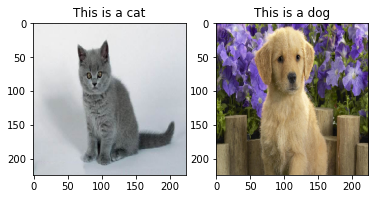

In [63]:
#预测网上找的图片
#猫
test_cat = load_img('cat_test.jpg', target_size=(224,224))
test_cat = img_to_array(test_cat)
x = np.expand_dims(test_cat, axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = model.predict_classes(features)

fig2 = plt.figure()
plt.subplot(121)
img_cat = load_img('cat_test.jpg', target_size=(224,224))
plt.imshow(img_cat)
result = ['cat' if result ==0 else 'dog']
plt.title('This is a '+result[0])

#狗
test_dog = load_img('dog_test.jpg', target_size=(224,224))
test_dog = img_to_array(test_dog)
x = np.expand_dims(test_dog, axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = model.predict_classes(features)

plt.subplot(122)
img_dog = load_img('dog_test.jpg', target_size=(224,224))
plt.imshow(img_dog)
result = ['cat' if result ==0 else 'dog']
plt.title('This is a '+result[0])

plt.show()